In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from feature_engine.encoding import DecisionTreeEncoder
from sklearn.linear_model import LinearRegression
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt

In [29]:
# Load the housing dataset
clean_data_df = pd.read_csv("Resource/clean_data_model.csv")
clean_data_df

,LotArea,LotShape,BldgType,YearBuilt,Neighborhood,YearRemodAdd,Heating,TtlHouseSF,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,PavedDrive,PoolArea,MoSold,YrSold,SalePrice
0,8450,Reg,1Fam,2003,College Creek,2003,GasA,2566,2,1,3,F,Attchd,2,Y,F,2,2008,208500
1,11250,IR1,1Fam,2001,College Creek,2002,GasA,2706,2,1,3,T,Attchd,2,Y,F,9,2008,223500
2,10652,IR1,1Fam,2006,College Creek,2007,GasA,2988,2,0,3,T,Attchd,3,Y,F,8,2007,279500
3,9742,Reg,1Fam,2002,College Creek,2002,GasA,3572,2,0,3,T,Attchd,2,Y,F,9,2008,230000
4,11049,Reg,1Fam,2007,College Creek,2007,GasA,2468,2,0,3,F,Attchd,2,Y,F,1,2008,179900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,9842,Reg,1Fam,1921,South & West of Iowa State University,1998,GasA,3213,3,1,4,F,BuiltIn,2,Y,F,5,2008,189000
1147,6292,Reg,1Fam,1930,South & West of Iowa State University,1950,GasA,1558,1,0,2,F,Detchd,1,Y,F,4,2008,91000
1148,6171,Reg,1Fam,1925,South & West of Iowa State University,1990,GasA,2584,2,1,3,T,Detchd,1,Y,F,10,2009,137450
1149,1950,Reg,Twnhs,1980,Bluestem,1980,GasA,2272,2,1,3,T,Attchd,2,Y,F,7,2008,151000


In [30]:
print(clean_data_df.isnull().sum())
clean_data_df.dropna(inplace=True)
clean_data_df.fillna(clean_data_df.mean(), inplace=True)
print(clean_data_df.isnull().sum())

LotArea          0
LotShape         0
BldgType         0
YearBuilt        0
Neighborhood     0
YearRemodAdd     0
Heating          0
TtlHouseSF       0
FullBath         0
HalfBath         0
BedroomAbvGr     0
Fireplaces       0
GarageType      72
GarageCars       0
PavedDrive       0
PoolArea         0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64
LotArea         0
LotShape        0
BldgType        0
YearBuilt       0
Neighborhood    0
YearRemodAdd    0
Heating         0
TtlHouseSF      0
FullBath        0
HalfBath        0
BedroomAbvGr    0
Fireplaces      0
GarageType      0
GarageCars      0
PavedDrive      0
PoolArea        0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64


C:\Users\phuong\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
# Split the data into features and target variable
X = clean_data_df.drop("SalePrice", axis=1)
y = clean_data_df["SalePrice"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [32]:
print(clean_data_df.shape[0]) 
print(X_train.shape[0])
print(y_train.shape[0])
print(X_test.shape[0])
print(y_test.shape[0])

1079
863
863
216
216


In [33]:
cat_features = ['LotShape', 'BldgType', 'Neighborhood', 'Heating', 'GarageType', 'PavedDrive', 'PoolArea', 'Fireplaces']


In [34]:
# The process of grouping labels that show a small number of observations in the dataset into a new category -”Rare”. 
# It prevents over-fitting.

rare_encoder = RareLabelEncoder(
    tol=0.02,      # labels with frequencies < 'tol' will be grouped
    n_categories=4,      # minimum categories required for encoding
    variables = cat_features) # categorical features list
rare_encoder.fit(X_train)
train_t = rare_encoder.transform(X_train)
test_t = rare_encoder.transform(X_test)

C:\Users\phuong\anaconda3\envs\mlenv\lib\site-packages\feature_engine\encoding\rare_label.py:202: UserWarning: The number of unique categories for variable LotShape is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
C:\Users\phuong\anaconda3\envs\mlenv\lib\site-packages\feature_engine\encoding\rare_label.py:202: UserWarning: The number of unique categories for variable PavedDrive is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
C:\Users\phuong\anaconda3\envs\mlenv\lib\site-packages\feature_engine\encoding\rare_label.py:202: UserWarning: The number of unique categories for variable PoolArea is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
C:\Users\phuong\anaconda3\envs\mlenv\lib\site-packages\feature_engine\encoding\rare_label.py:202: UserWarning: Th

In [35]:
# Since the rare categories are handble in categorical features, now convert them into useful numerical features.

ohe_encoder = OneHotEncoder(variables=cat_features)
ohe_encoder.fit(X_train)
ohe_train_t = ohe_encoder.transform(train_t)
ohe_test_t = ohe_encoder.transform(test_t)

In [36]:
train_t

,LotArea,LotShape,BldgType,YearBuilt,Neighborhood,YearRemodAdd,Heating,TtlHouseSF,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,PavedDrive,PoolArea,MoSold,YrSold
491,12000,Reg,1Fam,1948,Old Town,2005,GasA,2046,1,0,2,F,Attchd,2,Y,F,5,2008
666,11428,IR1,1Fam,2006,Northridge Heights,2006,GasA,3260,2,0,3,T,Attchd,3,Y,F,5,2007
286,21750,Reg,1Fam,1960,Mitchell,2006,GasA,1771,1,0,3,T,Attchd,2,Y,F,11,2009
404,11340,Reg,1Fam,1923,Old Town,1950,GasA,2400,1,0,4,F,Detchd,1,Y,F,3,2006
511,6120,Reg,1Fam,1931,Brookside,1993,GasA,1590,1,0,2,F,Detchd,1,Y,F,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,3182,Reg,TwnhsE,2005,Rare,2006,GasA,2290,2,0,2,T,Attchd,2,Y,F,9,2009
802,4224,Reg,TwnhsE,1976,Rare,1976,GasA,2284,1,1,3,T,Attchd,2,Y,F,8,2007
899,11512,IR1,1Fam,1959,Edwards,2006,GasA,2376,1,0,2,T,Rare,1,Y,F,5,2008
589,8740,IR1,1Fam,1982,Sawyer,1982,GasA,1700,1,0,2,F,Detchd,2,Y,F,7,2009


In [37]:
print(clean_data_df.shape[0]) 
print(X_train.shape[0])
print(y_train.shape[0])
print(X_test.shape[0])
print(y_test.shape[0])

1079
863
863
216
216


In [38]:
# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(ohe_train_t, y_train)

# Make predictions on the test set
rf_y_pred = rf.predict(ohe_test_t)



In [39]:
# Create a new column for the actual sale prices in the X_test dataframe
X_test['actual_sale_price'] = y_test

# Create a new column for the predictions in the original dataset
X_test['predicted_value_rf'] = rf_y_pred

# Concatenate the original dataset with the predictions
rf_result = pd.concat([X_train, X_test], ignore_index=True)
rf_result = rf_result[rf_result['predicted_value_rf'].notnull()]
rf_result

,LotArea,LotShape,BldgType,YearBuilt,Neighborhood,YearRemodAdd,Heating,TtlHouseSF,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,PavedDrive,PoolArea,MoSold,YrSold,actual_sale_price,predicted_value_rf
863,10420,Reg,1Fam,2009,Edwards,2009,GasA,2424,2,0,3,F,Attchd,2,Y,F,3,2010,186000.0,187558.00
864,6629,Reg,1Fam,1925,Edwards,1950,GasA,2041,2,0,3,F,Detchd,1,Y,F,7,2009,103600.0,112418.14
865,8366,IR1,1Fam,2004,Sawyer West,2004,GasA,2438,2,1,3,F,Attchd,2,Y,F,12,2008,173000.0,189801.65
866,11200,Reg,1Fam,1965,Sawyer,1965,GasA,2080,1,0,3,F,Detchd,1,Y,F,2,2008,129500.0,136738.87
867,6955,IR1,TwnhsE,2005,Northridge Heights,2006,GasA,2736,2,0,2,T,Attchd,2,Y,F,9,2006,202500.0,198533.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,34650,Reg,2fmCon,1955,Gilbert,1955,GasA,2112,1,0,3,F,Attchd,2,Y,F,1,2006,145000.0,132965.32
1075,7406,Reg,1Fam,2006,College Creek,2006,GasA,2419,2,0,2,F,Attchd,2,Y,F,7,2006,194000.0,184282.95
1076,10839,IR1,1Fam,1997,Gilbert,1998,GasA,2530,2,1,3,T,Attchd,2,Y,F,7,2008,181000.0,188404.80
1077,5310,Reg,1Fam,1910,Old Town,2003,GasA,2120,1,0,2,F,Attchd,1,Y,F,6,2006,117000.0,119434.64


In [40]:
# Write the dataframe to a CSV file
rf_result.to_csv('./Resource/predicted_data_randomforest.csv', index=False)

In [41]:
# Train the model using Multiple Linear Regression

# Create an instance of the LinearRegression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(ohe_train_t, y_train)

# Make predictions on the test set
lr_y_pred = reg.predict(ohe_test_t)

In [42]:
# Create a new column for the predictions in the original dataset
X_test['predicted_value_lr'] = lr_y_pred

# Concatenate the original dataset with the predictions
lr_result = pd.concat([X_train, X_test], ignore_index=True)
lr_result = lr_result[lr_result['predicted_value_lr'].notnull()]
lr_result

,LotArea,LotShape,BldgType,YearBuilt,Neighborhood,YearRemodAdd,Heating,TtlHouseSF,FullBath,HalfBath,...,Fireplaces,GarageType,GarageCars,PavedDrive,PoolArea,MoSold,YrSold,actual_sale_price,predicted_value_rf,predicted_value_lr
863,10420,Reg,1Fam,2009,Edwards,2009,GasA,2424,2,0,...,F,Attchd,2,Y,F,3,2010,186000.0,187558.00,184856.231084
864,6629,Reg,1Fam,1925,Edwards,1950,GasA,2041,2,0,...,F,Detchd,1,Y,F,7,2009,103600.0,112418.14,93989.029700
865,8366,IR1,1Fam,2004,Sawyer West,2004,GasA,2438,2,1,...,F,Attchd,2,Y,F,12,2008,173000.0,189801.65,195119.896649
866,11200,Reg,1Fam,1965,Sawyer,1965,GasA,2080,1,0,...,F,Detchd,1,Y,F,2,2008,129500.0,136738.87,115433.887657
867,6955,IR1,TwnhsE,2005,Northridge Heights,2006,GasA,2736,2,0,...,T,Attchd,2,Y,F,9,2006,202500.0,198533.45,243131.555844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,34650,Reg,2fmCon,1955,Gilbert,1955,GasA,2112,1,0,...,F,Attchd,2,Y,F,1,2006,145000.0,132965.32,94565.440474
1075,7406,Reg,1Fam,2006,College Creek,2006,GasA,2419,2,0,...,F,Attchd,2,Y,F,7,2006,194000.0,184282.95,189928.332392
1076,10839,IR1,1Fam,1997,Gilbert,1998,GasA,2530,2,1,...,T,Attchd,2,Y,F,7,2008,181000.0,188404.80,193483.315192
1077,5310,Reg,1Fam,1910,Old Town,2003,GasA,2120,1,0,...,F,Attchd,1,Y,F,6,2006,117000.0,119434.64,120389.884292


In [43]:
# Write the dataframe to a CSV file
lr_result.to_csv('./Resource/predicted_data_linearregression.csv', index=False)

# Evaluate
 
 MAE: measures the difference between the predicted value and the true value. It is calculated as the average of the absolute differences between the predicted values and the true values. The MAE is a useful metric for regression problems because it provides a sense of the magnitude of the errors in the predictions. It is also easy to interpret and understand, as it is expressed in the same units as the target variable. A lower MAE value indicates a better fit between the predicted values and the true values, while a higher MAE value indicates a worse fit. It is important to mention that the MAE is sensitive to outliers, so it is important to consider the distribution of the data and the presence of outliers when interpreting the MAE value.
 
 MSE is a measure of the average of the squared differences between the predicted values and the true values. It is a commonly used loss function for regression problems and it is used to evaluate the performance of a model. Like MAE it is easy to interpret, a lower MSE value indicates a better fit between the predicted values and the true values, while a higher MSE value indicates a worse fit.
 
 RMSE is an extension of the MSE. It is a popular measure of the differences between values (sample and population values) predicted by a model or an estimator and the true values. Like MAE and MSE it is easy to interpret, a lower RMSE value indicates a better fit between the predicted values and the true values, while a higher RMSE value indicates a worse fit.
 
 R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It is also known as the coefficient of determination. It ranges from 0 to 1, where 0 means that the model explains none of the variability of the response data around its mean, and 1 means the model explains all the variability of the response data around its mean. A higher R-squared value indicates a better fit between the predicted values and the true values, while a lower R² value indicates a worse fit.
 

In [44]:
# Evaluate the performance of the Random Forest model

print('Performance of Multiple Random Forest model:')

# Mean Absolute Error
rf_mae = mean_absolute_error(y_test, rf_y_pred)
print("Mean Absolute Error:", rf_mae)

# Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_y_pred)
print("Mean Squared Error:", rf_mse)

# Root Mean Squared Error
rf_rmse = np.sqrt(rf_mse)
print("Root Mean Squared Error:", rf_rmse)

# R-squared
rf_r2 = r2_score(y_test, rf_y_pred)
print("R-squared:", rf_r2)


Performance of Multiple Random Forest model:
Mean Absolute Error: 23597.114583333332
Mean Squared Error: 1301131919.1266153
Root Mean Squared Error: 36071.20623331878
R-squared: 0.8379139264316717


In [45]:
# Evaluate the performance of the Multiple Linear Regression model

print('Performance of Multiple Linear Regression model:')

# Mean Absolute Error
lr_mae = mean_absolute_error(y_test, lr_y_pred)
print("Mean Absolute Error:", lr_mae)

# Mean Squared Error
lr_mse = mean_squared_error(y_test, lr_y_pred)
print("Mean Squared Error:", lr_mse)

# Root Mean Squared Error
lr_rmse = np.sqrt(lr_mse)
print("Root Mean Squared Error:", lr_rmse)

# R-squared
lr_r2 = r2_score(y_test, lr_y_pred)
print("R-squared:", lr_r2)


Performance of Multiple Linear Regression model:
Mean Absolute Error: 27394.426625044114
Mean Squared Error: 1843255963.9106634
Root Mean Squared Error: 42933.156929239005
R-squared: 0.7703798382163813


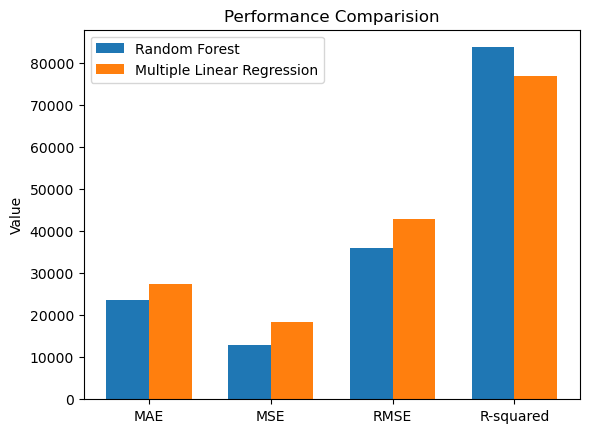

In [61]:
# Create a bar chart to compare the performance of the two models
metrics = ['MAE', 'MSE', 'RMSE', 'R-squared']
values1 = [rf_mae, rf_mse/100000, rf_rmse, rf_r2*100000]
values2 = [lr_mae, lr_mse/100000, lr_rmse, lr_r2*100000]

x = np.arange(len(metrics))
fig, ax = plt.subplots()
bar_width = 0.35

bar1 = ax.bar(x - bar_width/2, values1, bar_width, label='Random Forest')
bar2 = ax.bar(x + bar_width/2, values2, bar_width, label='Multiple Linear Regression')

ax.set_ylabel('Value')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_title('Performance Comparision')
plt.show()

In [46]:
#Feature Importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print(f'{ohe_train_t.columns[i]} : {v}')

LotArea : 0.03242640796687726
YearBuilt : 0.05741867523160232
YearRemodAdd : 0.05092580207213001
TtlHouseSF : 0.7461103909062503
FullBath : 0.004710981316813602
HalfBath : 0.003592990318164968
BedroomAbvGr : 0.007459118504197622
GarageCars : 0.023667017540122612
MoSold : 0.016520326815374065
YrSold : 0.009631458730115082
LotShape_Reg : 0.002009568987557948
LotShape_IR1 : 0.002079318093887476
LotShape_IR2 : 0.0008649494303084676
LotShape_IR3 : 8.489116687856702e-05
BldgType_1Fam : 0.0014938074738344415
BldgType_Twnhs : 0.00016693144701786198
BldgType_TwnhsE : 0.000586524803617416
BldgType_Duplex : 0.0
BldgType_2fmCon : 0.0
Neighborhood_Old Town : 0.001293531935749978
Neighborhood_Northridge Heights : 0.0019169034302888544
Neighborhood_Mitchell : 0.0003698649687445262
Neighborhood_Brookside : 0.0003112944781440066
Neighborhood_College Creek : 0.0018667940637540075
Neighborhood_Timberland : 0.00046829103264941894
Neighborhood_Edwards : 0.005719880361258086
Neighborhood_Meadow Village : 0.

In [47]:
print("X_train shape:", X_train.shape)
feature_names = ohe_train_t.columns
print("feature_names length:", len(feature_names))

X_train shape: (863, 18)
feature_names length: 62


In [48]:
# Create a dataframe of feature names and their importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importance})

# Sort the dataframe by importance in descending order
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 most important features
print(feature_importances.head(10))

                     feature  importance
3                 TtlHouseSF    0.746110
1                  YearBuilt    0.057419
2               YearRemodAdd    0.050926
0                    LotArea    0.032426
7                 GarageCars    0.023667
8                     MoSold    0.016520
9                     YrSold    0.009631
6               BedroomAbvGr    0.007459
25      Neighborhood_Edwards    0.005720
38  Neighborhood_Stone Brook    0.005506


Text(0.5, 1.0, 'Top 10 Most Important Features - Random Forest Model')

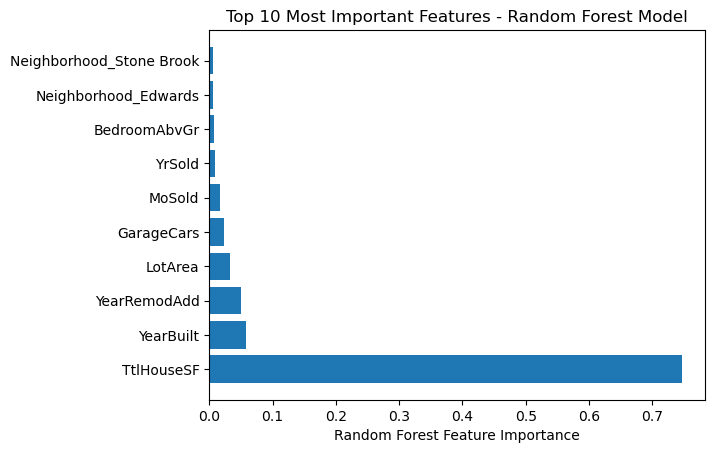

In [49]:
plt.barh(feature_importances['feature'].head(10), feature_importances['importance'].head(10))
plt.xlabel("Random Forest Feature Importance")
plt.title("Top 10 Most Important Features - Random Forest Model")

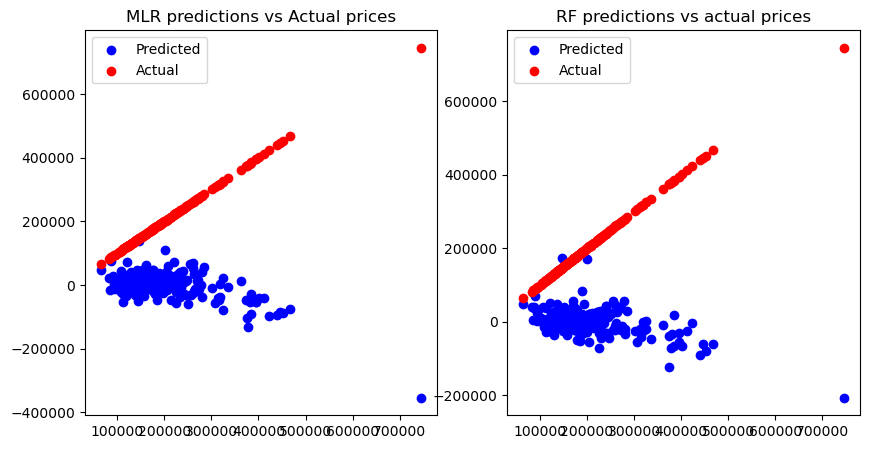

In [62]:
import matplotlib.pyplot as plt

lr_diff = lr_y_pred - y_test
rf_diff = rf_y_pred - y_test

# Plot the differences
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(y_test, lr_diff, c='blue', label='Predicted')
ax[0].scatter(y_test, y_test, c='red', label='Actual')
ax[0].set_title('MLR predictions vs Actual prices')
ax[0].legend()
ax[1].scatter(y_test, rf_diff, c='blue', label='Predicted')
ax[1].scatter(y_test, y_test, c='red', label='Actual')
ax[1].set_title('RF predictions vs actual prices')
ax[1].legend()
plt.show()


In [54]:
lr_result

,LotArea,LotShape,BldgType,YearBuilt,Neighborhood,YearRemodAdd,Heating,TtlHouseSF,FullBath,HalfBath,...,Fireplaces,GarageType,GarageCars,PavedDrive,PoolArea,MoSold,YrSold,actual_sale_price,predicted_value_rf,predicted_value_lr
863,10420,Reg,1Fam,2009,Edwards,2009,GasA,2424,2,0,...,F,Attchd,2,Y,F,3,2010,186000.0,187558.00,184856.231084
864,6629,Reg,1Fam,1925,Edwards,1950,GasA,2041,2,0,...,F,Detchd,1,Y,F,7,2009,103600.0,112418.14,93989.029700
865,8366,IR1,1Fam,2004,Sawyer West,2004,GasA,2438,2,1,...,F,Attchd,2,Y,F,12,2008,173000.0,189801.65,195119.896649
866,11200,Reg,1Fam,1965,Sawyer,1965,GasA,2080,1,0,...,F,Detchd,1,Y,F,2,2008,129500.0,136738.87,115433.887657
867,6955,IR1,TwnhsE,2005,Northridge Heights,2006,GasA,2736,2,0,...,T,Attchd,2,Y,F,9,2006,202500.0,198533.45,243131.555844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,34650,Reg,2fmCon,1955,Gilbert,1955,GasA,2112,1,0,...,F,Attchd,2,Y,F,1,2006,145000.0,132965.32,94565.440474
1075,7406,Reg,1Fam,2006,College Creek,2006,GasA,2419,2,0,...,F,Attchd,2,Y,F,7,2006,194000.0,184282.95,189928.332392
1076,10839,IR1,1Fam,1997,Gilbert,1998,GasA,2530,2,1,...,T,Attchd,2,Y,F,7,2008,181000.0,188404.80,193483.315192
1077,5310,Reg,1Fam,1910,Old Town,2003,GasA,2120,1,0,...,F,Attchd,1,Y,F,6,2006,117000.0,119434.64,120389.884292


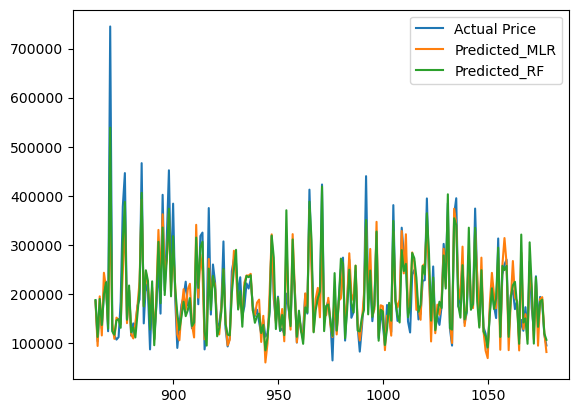

In [55]:
# Plot the columns
plt.plot(lr_result['actual_sale_price'], label='Actual Price')
plt.plot(lr_result['predicted_value_lr'], label='Predicted_MLR')
plt.plot(lr_result['predicted_value_rf'], label='Predicted_RF')
plt.legend()
plt.show()